In [ ]:
# OBSERVATIONS:
#1. lATITUDE VS. TEMPERATURE: THERE IS A CLEAR PATTERN HERE SHOWING AN INCREASE IN TEMPERATURE THE CLOSER YOU GET TO THE EQUATOR.
#2. NO EVIDENT TREND APPEARS WHEN COMPARING CITY LATITUDE AND HUMIDITY. STRANGE IN THIS CASE THAT I ENDED UP WITH AN EXTREME OUTLIER.
#   I WOULD WANT TO FIND THIS CITY AND REMOVE IT FORM THE DATAFRAME SO IT DOESN'T SKEW THE DATA. THE PLOT WOULD LOOK BETTER
#   THIS WAY.
#3. THERE SEEMS TO BE NO APPRENT RELATIONSHIP BETWEEN LATITUDE AND CLOUDINESS.
#4. THERE SEEMS TO BE NO APPRENT RELATIONSHIP BETWEEN LATITUDE AND WIND SPEED

In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import urllib

# Import API key
# from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [15]:
# Generate Cities List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

In [16]:
# Perform API Calls
api_key = "6652103db99324ced0309c9473f32a21"

#Call base URL
url = "http://api.openweathermap.org/data/2.5/weather?appid=" + api_key

In [17]:
# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + urllib.request.pathname2url(city)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print(city_url)

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port alfred
http://api.openweathermap.org/data/2.5/weather?appid=6652103db99324ced0309c9473f32a21&q=port%20alfred
Processing Record 2 of Set 1 | kirovskiy
http://api.openweathermap.org/data/2.5/weather?appid=6652103db99324ced0309c9473f32a21&q=kirovskiy
Processing Record 3 of Set 1 | buala
http://api.openweathermap.org/data/2.5/weather?appid=6652103db99324ced0309c9473f32a21&q=buala
Processing Record 4 of Set 1 | jardim
http://api.openweathermap.org/data/2.5/weather?appid=6652103db99324ced0309c9473f32a21&q=jardim
Processing Record 5 of Set 1 | vaitupu
http://api.openweathermap.org/data/2.5/weather?appid=6652103db99324ced0309c9473f32a21&q=vaitupu
City not found. Skipping...
Processing Record 6 of Set 1 | yellowknife
http://api.openweathermap.org/data/2.5/weather?appid=6652103db99324ced0309c9473f32a21&q=yellowknife
Processing Record 7 of Set 1 | cidreira
http://api.openweathermap.org/data/2.5/weather

Processing Record 7 of Set 2 | kenai
http://api.openweathermap.org/data/2.5/weather?appid=6652103db99324ced0309c9473f32a21&q=kenai
Processing Record 8 of Set 2 | georgetown
http://api.openweathermap.org/data/2.5/weather?appid=6652103db99324ced0309c9473f32a21&q=georgetown
Processing Record 9 of Set 2 | marcona
http://api.openweathermap.org/data/2.5/weather?appid=6652103db99324ced0309c9473f32a21&q=marcona
City not found. Skipping...
Processing Record 10 of Set 2 | chokurdakh
http://api.openweathermap.org/data/2.5/weather?appid=6652103db99324ced0309c9473f32a21&q=chokurdakh
Processing Record 11 of Set 2 | aurillac
http://api.openweathermap.org/data/2.5/weather?appid=6652103db99324ced0309c9473f32a21&q=aurillac
Processing Record 12 of Set 2 | longyearbyen
http://api.openweathermap.org/data/2.5/weather?appid=6652103db99324ced0309c9473f32a21&q=longyearbyen
Processing Record 13 of Set 2 | castro
http://api.openweathermap.org/data/2.5/weather?appid=6652103db99324ced0309c9473f32a21&q=castro
Proce

Processing Record 15 of Set 3 | katobu
http://api.openweathermap.org/data/2.5/weather?appid=6652103db99324ced0309c9473f32a21&q=katobu
Processing Record 16 of Set 3 | tessalit
http://api.openweathermap.org/data/2.5/weather?appid=6652103db99324ced0309c9473f32a21&q=tessalit
Processing Record 17 of Set 3 | beringovskiy
http://api.openweathermap.org/data/2.5/weather?appid=6652103db99324ced0309c9473f32a21&q=beringovskiy
Processing Record 18 of Set 3 | hilo
http://api.openweathermap.org/data/2.5/weather?appid=6652103db99324ced0309c9473f32a21&q=hilo
Processing Record 19 of Set 3 | plaistow
http://api.openweathermap.org/data/2.5/weather?appid=6652103db99324ced0309c9473f32a21&q=plaistow
Processing Record 20 of Set 3 | mar del plata
http://api.openweathermap.org/data/2.5/weather?appid=6652103db99324ced0309c9473f32a21&q=mar%20del%20plata
Processing Record 21 of Set 3 | komsomolskiy
http://api.openweathermap.org/data/2.5/weather?appid=6652103db99324ced0309c9473f32a21&q=komsomolskiy
Processing Recor

Processing Record 24 of Set 4 | calella
http://api.openweathermap.org/data/2.5/weather?appid=6652103db99324ced0309c9473f32a21&q=calella
Processing Record 25 of Set 4 | pio xii
http://api.openweathermap.org/data/2.5/weather?appid=6652103db99324ced0309c9473f32a21&q=pio%20xii
Processing Record 26 of Set 4 | louisbourg
http://api.openweathermap.org/data/2.5/weather?appid=6652103db99324ced0309c9473f32a21&q=louisbourg
City not found. Skipping...
Processing Record 27 of Set 4 | polewali
http://api.openweathermap.org/data/2.5/weather?appid=6652103db99324ced0309c9473f32a21&q=polewali
Processing Record 28 of Set 4 | dongsheng
http://api.openweathermap.org/data/2.5/weather?appid=6652103db99324ced0309c9473f32a21&q=dongsheng
Processing Record 29 of Set 4 | bambous virieux
http://api.openweathermap.org/data/2.5/weather?appid=6652103db99324ced0309c9473f32a21&q=bambous%20virieux
Processing Record 30 of Set 4 | mount gambier
http://api.openweathermap.org/data/2.5/weather?appid=6652103db99324ced0309c947

Processing Record 31 of Set 5 | luderitz
http://api.openweathermap.org/data/2.5/weather?appid=6652103db99324ced0309c9473f32a21&q=luderitz
Processing Record 32 of Set 5 | seryshevo
http://api.openweathermap.org/data/2.5/weather?appid=6652103db99324ced0309c9473f32a21&q=seryshevo
Processing Record 33 of Set 5 | priverno
http://api.openweathermap.org/data/2.5/weather?appid=6652103db99324ced0309c9473f32a21&q=priverno
Processing Record 34 of Set 5 | calnali
http://api.openweathermap.org/data/2.5/weather?appid=6652103db99324ced0309c9473f32a21&q=calnali
Processing Record 35 of Set 5 | abha
http://api.openweathermap.org/data/2.5/weather?appid=6652103db99324ced0309c9473f32a21&q=abha
Processing Record 36 of Set 5 | jinchang
http://api.openweathermap.org/data/2.5/weather?appid=6652103db99324ced0309c9473f32a21&q=jinchang
Processing Record 37 of Set 5 | port hedland
http://api.openweathermap.org/data/2.5/weather?appid=6652103db99324ced0309c9473f32a21&q=port%20hedland
Processing Record 38 of Set 5 | 

Processing Record 39 of Set 6 | saldanha
http://api.openweathermap.org/data/2.5/weather?appid=6652103db99324ced0309c9473f32a21&q=saldanha
Processing Record 40 of Set 6 | vanavara
http://api.openweathermap.org/data/2.5/weather?appid=6652103db99324ced0309c9473f32a21&q=vanavara
Processing Record 41 of Set 6 | atar
http://api.openweathermap.org/data/2.5/weather?appid=6652103db99324ced0309c9473f32a21&q=atar
Processing Record 42 of Set 6 | willowmore
http://api.openweathermap.org/data/2.5/weather?appid=6652103db99324ced0309c9473f32a21&q=willowmore
Processing Record 43 of Set 6 | bubaque
http://api.openweathermap.org/data/2.5/weather?appid=6652103db99324ced0309c9473f32a21&q=bubaque
Processing Record 44 of Set 6 | gravdal
http://api.openweathermap.org/data/2.5/weather?appid=6652103db99324ced0309c9473f32a21&q=gravdal
Processing Record 45 of Set 6 | urucara
http://api.openweathermap.org/data/2.5/weather?appid=6652103db99324ced0309c9473f32a21&q=urucara
Processing Record 46 of Set 6 | mountain hom

Processing Record 48 of Set 7 | vilhena
http://api.openweathermap.org/data/2.5/weather?appid=6652103db99324ced0309c9473f32a21&q=vilhena
Processing Record 49 of Set 7 | blagoyevo
http://api.openweathermap.org/data/2.5/weather?appid=6652103db99324ced0309c9473f32a21&q=blagoyevo
Processing Record 0 of Set 8 | tuy hoa
http://api.openweathermap.org/data/2.5/weather?appid=6652103db99324ced0309c9473f32a21&q=tuy%20hoa
Processing Record 1 of Set 8 | beterou
http://api.openweathermap.org/data/2.5/weather?appid=6652103db99324ced0309c9473f32a21&q=beterou
Processing Record 2 of Set 8 | ancud
http://api.openweathermap.org/data/2.5/weather?appid=6652103db99324ced0309c9473f32a21&q=ancud
Processing Record 3 of Set 8 | humberto de campos
http://api.openweathermap.org/data/2.5/weather?appid=6652103db99324ced0309c9473f32a21&q=humberto%20de%20campos
Processing Record 4 of Set 8 | grand forks
http://api.openweathermap.org/data/2.5/weather?appid=6652103db99324ced0309c9473f32a21&q=grand%20forks
Processing Reco

Processing Record 6 of Set 9 | wagar
http://api.openweathermap.org/data/2.5/weather?appid=6652103db99324ced0309c9473f32a21&q=wagar
Processing Record 7 of Set 9 | sao joao da barra
http://api.openweathermap.org/data/2.5/weather?appid=6652103db99324ced0309c9473f32a21&q=sao%20joao%20da%20barra
Processing Record 8 of Set 9 | ankang
http://api.openweathermap.org/data/2.5/weather?appid=6652103db99324ced0309c9473f32a21&q=ankang
Processing Record 9 of Set 9 | gra liyia
http://api.openweathermap.org/data/2.5/weather?appid=6652103db99324ced0309c9473f32a21&q=gra%20liyia
Processing Record 10 of Set 9 | tura
http://api.openweathermap.org/data/2.5/weather?appid=6652103db99324ced0309c9473f32a21&q=tura
Processing Record 11 of Set 9 | luau
http://api.openweathermap.org/data/2.5/weather?appid=6652103db99324ced0309c9473f32a21&q=luau
Processing Record 12 of Set 9 | hefei
http://api.openweathermap.org/data/2.5/weather?appid=6652103db99324ced0309c9473f32a21&q=hefei
Processing Record 13 of Set 9 | bejar
http

Processing Record 16 of Set 10 | sumbawa
http://api.openweathermap.org/data/2.5/weather?appid=6652103db99324ced0309c9473f32a21&q=sumbawa
City not found. Skipping...
Processing Record 17 of Set 10 | tekit
http://api.openweathermap.org/data/2.5/weather?appid=6652103db99324ced0309c9473f32a21&q=tekit
Processing Record 18 of Set 10 | yomitan
http://api.openweathermap.org/data/2.5/weather?appid=6652103db99324ced0309c9473f32a21&q=yomitan
City not found. Skipping...
Processing Record 19 of Set 10 | bin qirdan
http://api.openweathermap.org/data/2.5/weather?appid=6652103db99324ced0309c9473f32a21&q=bin%20qirdan
Processing Record 20 of Set 10 | mazagao
http://api.openweathermap.org/data/2.5/weather?appid=6652103db99324ced0309c9473f32a21&q=mazagao
Processing Record 21 of Set 10 | atbasar
http://api.openweathermap.org/data/2.5/weather?appid=6652103db99324ced0309c9473f32a21&q=atbasar
Processing Record 22 of Set 10 | skibbereen
http://api.openweathermap.org/data/2.5/weather?appid=6652103db99324ced0309

Processing Record 25 of Set 11 | wattegama
http://api.openweathermap.org/data/2.5/weather?appid=6652103db99324ced0309c9473f32a21&q=wattegama
Processing Record 26 of Set 11 | khanpur
http://api.openweathermap.org/data/2.5/weather?appid=6652103db99324ced0309c9473f32a21&q=khanpur
Processing Record 27 of Set 11 | warri
http://api.openweathermap.org/data/2.5/weather?appid=6652103db99324ced0309c9473f32a21&q=warri
Processing Record 28 of Set 11 | buzmeyin
http://api.openweathermap.org/data/2.5/weather?appid=6652103db99324ced0309c9473f32a21&q=buzmeyin
Processing Record 29 of Set 11 | sao gabriel da cachoeira
http://api.openweathermap.org/data/2.5/weather?appid=6652103db99324ced0309c9473f32a21&q=sao%20gabriel%20da%20cachoeira
Processing Record 30 of Set 11 | kupang
http://api.openweathermap.org/data/2.5/weather?appid=6652103db99324ced0309c9473f32a21&q=kupang
Processing Record 31 of Set 11 | magomeni
http://api.openweathermap.org/data/2.5/weather?appid=6652103db99324ced0309c9473f32a21&q=magomeni

Processing Record 33 of Set 12 | mawlaik
http://api.openweathermap.org/data/2.5/weather?appid=6652103db99324ced0309c9473f32a21&q=mawlaik
Processing Record 34 of Set 12 | chiredzi
http://api.openweathermap.org/data/2.5/weather?appid=6652103db99324ced0309c9473f32a21&q=chiredzi
Processing Record 35 of Set 12 | voisiku
http://api.openweathermap.org/data/2.5/weather?appid=6652103db99324ced0309c9473f32a21&q=voisiku
City not found. Skipping...
Processing Record 36 of Set 12 | rodez
http://api.openweathermap.org/data/2.5/weather?appid=6652103db99324ced0309c9473f32a21&q=rodez
Processing Record 37 of Set 12 | pacific grove
http://api.openweathermap.org/data/2.5/weather?appid=6652103db99324ced0309c9473f32a21&q=pacific%20grove
Processing Record 38 of Set 12 | dombarovskiy
http://api.openweathermap.org/data/2.5/weather?appid=6652103db99324ced0309c9473f32a21&q=dombarovskiy
Processing Record 39 of Set 12 | aba
http://api.openweathermap.org/data/2.5/weather?appid=6652103db99324ced0309c9473f32a21&q=aba

In [19]:
# Convert Raw Data to DataFrame
city_data_df = pd.DataFrame(city_data)

#Retrieve fields needed for analysis (Lat, max temp, humidity, cloudiness, wind speed)
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [22]:
# Export the city data into a .csv.
city_data_df.to_csv("weather_output.csv")

# Display the DataFrame
city_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,port alfred,68,ZA,1547941619,97,-33.59,26.89,290.532,3.77
1,kirovskiy,44,RU,1547941620,75,45.09,133.51,256.782,2.52
2,buala,44,SB,1547941620,91,-8.15,159.59,302.157,1.57
3,jardim,48,BR,1547941386,69,-21.48,-56.15,299.557,2.92
4,yellowknife,75,CA,1547938800,76,62.45,-114.38,249.150,8.20


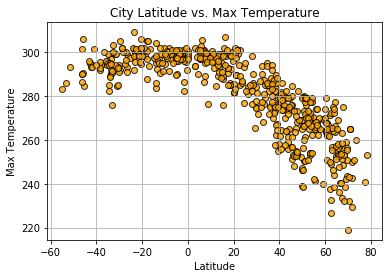

In [51]:
# Plot data Latitude vs. Max Temp
plt.scatter(lats, 
            max_temps,color = "orange",
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")



# Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
plt.title ("City Latitude vs. Max Temperature")
plt.ylabel ("Max Temperature")
plt.xlabel ("Latitude")
plt.grid(True)

# Save the plotted figures as .pngs.
plt.savefig("Lat_v_Temp.png")


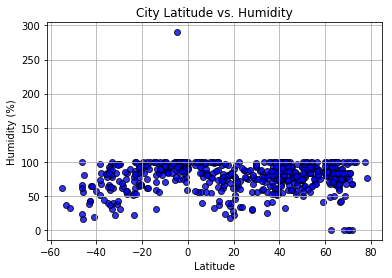

In [52]:
#  Latitude vs. Humidity Plot
plt.scatter(lats, 
            humidity,color = "blue",
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")


# Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
plt.title ("City Latitude vs. Humidity")
plt.ylabel ("Humidity (%)")
plt.xlabel ("Latitude")
plt.grid(True)

# Save the plotted figures as .pngs.
plt.savefig("Lat_v_Humidity.png")

plt.show()

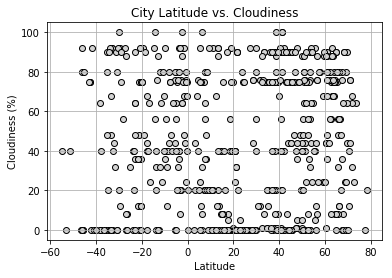

In [46]:
# Latitude vs. Cloudiness Plot

plt.scatter(lats, 
            cloudiness,color = "lightgray",
            edgecolor="black", linewidths=1, marker="o", 
            alpha=1.0, label="Cities")


# Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
plt.title ("City Latitude vs. Cloudiness")
plt.ylabel ("Cloudiness (%)")
plt.xlabel ("Latitude")
plt.grid(True)

# Save the plotted figures as .pngs.
plt.savefig("Lat_v_Cloudiness.png")

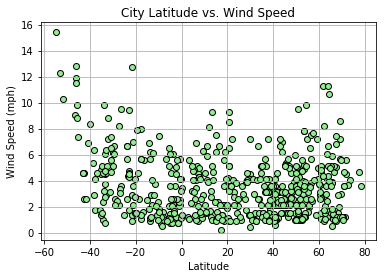

In [45]:
#  Latitude vs. Wind Speed Plot

plt.scatter(lats, 
            wind_speed,color = "lightgreen",
            edgecolor="black", linewidths=1, marker="o", 
            alpha=1.0, label="Cities")


# Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
plt.title ("City Latitude vs. Wind Speed")
plt.ylabel ("Wind Speed (mph)")
plt.xlabel ("Latitude")
plt.grid(True)

# Save the plotted figures as .pngs.
plt.savefig("Lat_v_WindSpeed.png")
